<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/MATH345_LAB_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Central Limit Theorem**

The *Central Limit Theorem* provides important information about *means of sample* extracted from a larger population. Simply formulated, the theorem states that given samples of size $n$ extracted from a larger population, the sample mean $\bar{x}$ will approach a Gaussian distribution. 

*Note:* The CLT holds true for a population with a finite standart deviation.

An example of the CLT in action was briefly discussed in the first lab - Binomial Distribution.

**Problem: Central Limit Theorem and Confidence Intervals:**

For this lab you will work with a dataset of dietary data per country over a series of years. Start by filtering data for a particular year from this dataset and that will serve as your group data. The function `drop()` from the `pandas` library might be useful.

1.   Choose the data category (ex. Fruit and Vegetables) that you want to work with and provide a comprehensive description of the dataset.
2.   Using the chosen dataset, you will have to prove that the Central Limit Theorem holds true. We suggest extracting samples of size $n = 10$ elements when computing the sample mean $\bar{x}$. The function `sample` from the `random` library might be useful.

In [ ]:
# Solution: Use as many cells as you need

In [2]:
# we start by importing the necessary packages

from google.colab import files 

import pandas as pd
import numpy as np
from scipy.stats import norm, sem

import random

import matplotlib.pyplot as plt

In [5]:
# Here, we will upload our data from a local machine directly into our colab notebook

uploaded = files.upload()
df = pd.read_csv('dietary-compositions-by-commodity-group.csv') 

Saving dietary-compositions-by-commodity-group.csv to dietary-compositions-by-commodity-group.csv


In [103]:
# Extracting the 2013 year from the dataset
indeces_to_drop = []
for index in range (len(df['Entity'])):
    if df['Year'][index] != 2013:
        indeces_to_drop.append(index)

df_2013 = df.drop(indeces_to_drop)

df_2013

,Entity,Code,Year,Cereals and Grains (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Starchy Roots (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat (FAO (2017)) (kilocalories per person per day),Dairy & Eggs (FAO (2017)) (kilocalories per person per day),Fruit and Vegetables (FAO (2017)) (kilocalories per person per day),Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)
52,Afghanistan,AFG,2013,1560,23,15,87,149,68,105,68,15,0.0
105,Albania,ALB,2013,1144,50,78,197,322,345,579,372,33,73.0
158,Algeria,DZA,2013,1678,79,126,265,409,103,254,339,36,7.0
211,Angola,AGO,2013,717,81,729,146,268,214,24,166,13,115.0
264,Antigua and Barbuda,ATG,2013,651,28,45,302,321,457,239,228,62,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7941,Venezuela,VEN,2013,969,54,92,388,434,271,166,139,27,91.0
7994,Vietnam,VNM,2013,1552,28,43,100,254,472,42,181,34,39.0
8047,Yemen,YEM,2013,1355,60,22,273,229,104,64,89,26,1.0
8100,Zambia,ZMB,2013,1135,17,246,100,266,71,26,30,7,32.0


2013 Sugar Consumption per day per person
Mean ± St.Dev. :  288.31 ± 138.87 Cal
Lower Bound: 38 Cal - Country: North Korea
Upper Bound: 600 Cal - Country: United States



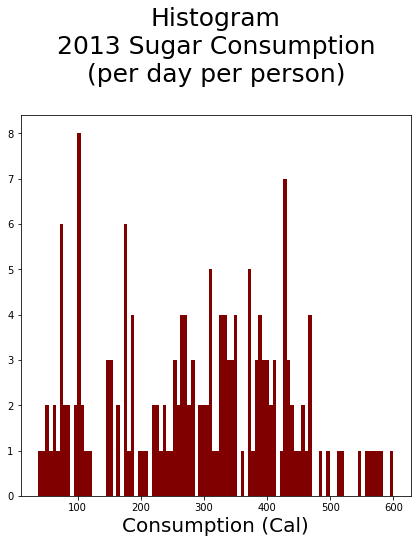

In [122]:
# Chosing the Sugar column as our population

sugar = list(df_2013['Sugar (FAO (2017)) (kilocalories per person per day)'])

print(f'2013 Sugar Consumption per day per person\nMean \u00b1 St.Dev. :  {np.round(np.mean(sugar),2)} \u00b1 {np.round(np.std(sugar),2)} Cal')
print(f'Lower Bound: {np.round(np.min(sugar),2)} Cal - Country: {df_2013.iloc[list(sugar).index(np.min(sugar)),0]}')
print(f'Upper Bound: {np.round(np.max(sugar),2)} Cal - Country: {df_2013.iloc[list(sugar).index(np.max(sugar)),0]}\n')

plt.figure(figsize = (7,7))

plt.hist(sugar, bins  = 100, color = 'maroon')

plt.title('Histogram\n2013 Sugar Consumption\n(per day per person)\n', fontsize  = 25)

plt.xlabel('Consumption (Cal)', fontsize = 20)

plt.show()



In [13]:
#CLT

N = 5000 # number of samples
mean_list = [] # list of sample means 

# CLT in action

for count in range(N): 
    selected_list = random.sample(dairy, 10)
    mean_list.append(np.mean(selected_list))

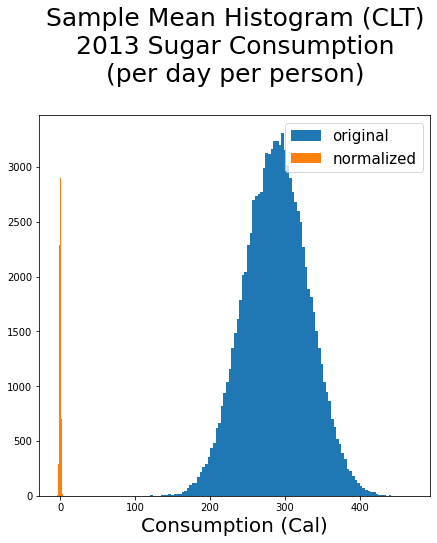

In [124]:
# Sample Mean Histogram and its normalization 

norm_list = (mean_list- np.mean(mean_list))/np.std(mean_list)

# Plotting

plt.figure(figsize = (7,7))

plt.hist(mean_list, bins  = 100, label = 'original')
plt.hist(norm_list, bins  = 100, label = 'normalized')

plt.legend(fontsize = 15)

plt.title('Sample Mean Histogram (CLT)\n2013 Sugar Consumption\n(per day per person)\n', fontsize  = 25)

plt.xlabel('Consumption (Cal)', fontsize = 20)

plt.show()



**How to Calculate the Confidence Interval**

In simple words, calculating the confidence interval involves determining the mean of the sample from a population and determining the margin of error based on a confidence interval. Given a random sample of size $n$ extracted from a large population, we define the confidence interval as:

$$
\bar{x} \pm (z^*)\times \left( \frac{s}{\sqrt{n}} \right),
$$ 
where $z^{*}$ is the $\frac{1+C}{2}$ critical value of a standart normal distribution, while $C$ is the desired confidence.



3.   Your next task is to create a function that takes in a sample of data from your population along with a confidence value from the $(0.0,1.0)$ interval and returns the Confidence Interval.
4.   Then, using the set function, you will calculate and plot the confidence interval for $C = \{0.5, ~0.55, \cdot\cdot\cdot , ~0.95 \}$. Describe your results and their meaning.




In [ ]:
# Solution: Use as many cells as you need

In [133]:
def mean_confidence_interval(data_sample, confidence):
    n = len(data_sample) # number of elements in the extracted sample
    m, se = np.mean(data_sample), sem(data_sample) # mean and standard error of the mean
    h = se * norm.ppf((1.0 + confidence) / 2.0) # z * st_err_of_mean ( minus sign to keep h positive)
    return confidence, m, h # returns confidence mean, deviation from mean

In [136]:
confidence_list = np.arange(0.5,1.0,0.05)

conf_intervals = []

data_sample = random.sample(dairy, 10)

for confidence in confidence_list:
    conf_intervals.append(mean_confidence_interval(data_sample, confidence))


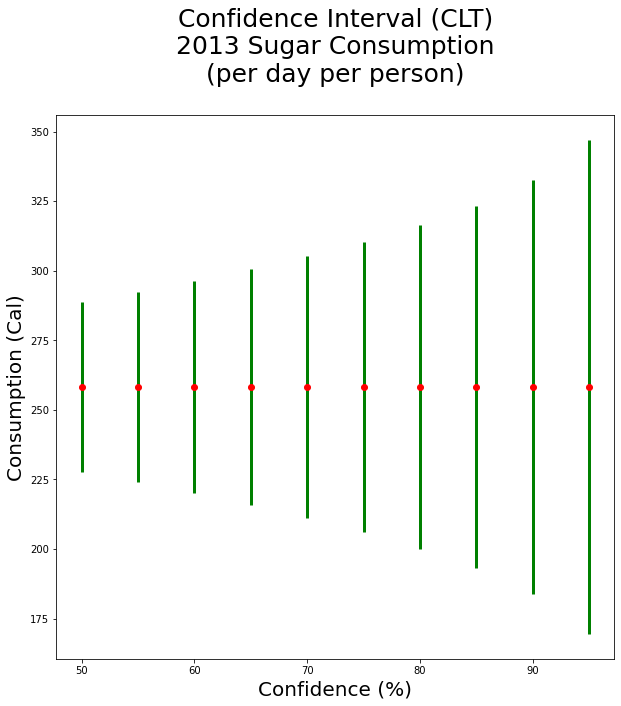

In [145]:
plt.figure(figsize = (10,10))

for i in range (len(confidence_list)):
    plt.errorbar(conf_intervals[i][0]*100, conf_intervals[i][1], yerr=conf_intervals[i][2], fmt='o', color='red', ecolor='green', elinewidth=3, capsize=0)

plt.title('Confidence Interval (CLT)\n2013 Sugar Consumption\n(per day per person)\n', fontsize  = 25)

plt.xlabel('Confidence (%)', fontsize = 20)
plt.ylabel('Consumption (Cal)', fontsize = 20)

plt.show()

Sources: 

http://www.stat.yale.edu/Courses/1997-98/101/confint.htm#:~:text=For%20a%20population%20with%20unknown,for%20the%20standard%20normal%20distribution.

http://www.stat.yale.edu/Courses/1997-98/101/sampmn.htm#clt

https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/
